In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

# View all of the classes that automap found
Base.classes.keys()
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [5]:
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2e513a34af0>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [6]:
for row in session.query(Measure.station, Measure.date).limit(15).all():
    print(row)


('USC00519397', '2010-01-01')
('USC00519397', '2010-01-02')
('USC00519397', '2010-01-03')
('USC00519397', '2010-01-04')
('USC00519397', '2010-01-06')
('USC00519397', '2010-01-07')
('USC00519397', '2010-01-08')
('USC00519397', '2010-01-09')
('USC00519397', '2010-01-10')
('USC00519397', '2010-01-11')
('USC00519397', '2010-01-12')
('USC00519397', '2010-01-14')
('USC00519397', '2010-01-15')
('USC00519397', '2010-01-16')
('USC00519397', '2010-01-17')


In [7]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2e51838c340>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [8]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
most_recent_date

('2017-08-23',)

In [9]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [10]:
current = dt.date(2017, 8, 23)
current

datetime.date(2017, 8, 23)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

current = dt.date(2017, 8, 23)
current
year_ago = current - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores

last_year_prcp = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date >= year_ago).\
    filter(Measure.date <= current).\
    order_by(Measure.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

rain_df = dict(last_year_prcp)
# clean_rain_df = rain_df.dropna(how='any')
rain_df


2016-08-23


{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

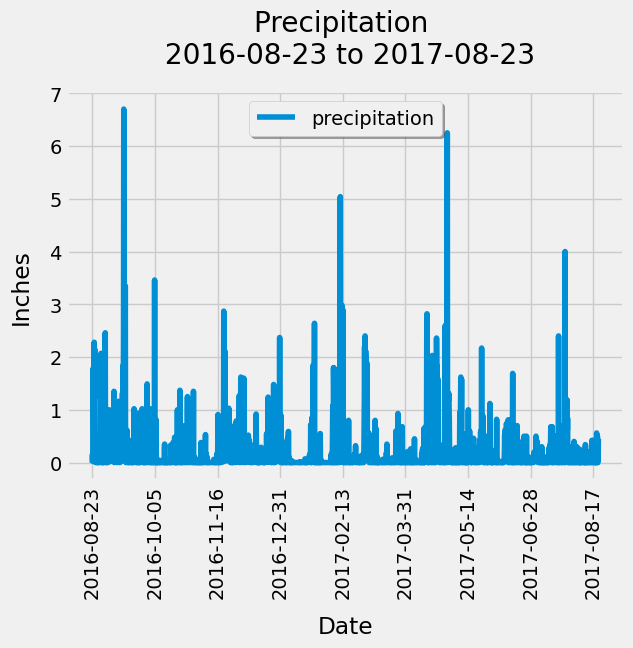

In [29]:
clean_rain_df.plot('date', 'prcp')
font = {'weight': 'bold', 'size': '10'}
# plt.figure(figsize=(15, 10))
plt.style.use('fivethirtyeight')
plt.xlabel("Date", labelpad=12)
plt.ylabel("Inches", labelpad=12)
plt.title(f'Precipitation \n {year_ago} to {current}', pad=20)
plt.legend(["precipitation"],loc='best', shadow=True)
plt.xticks(rotation="vertical")
# plt.tight_layout()
# plt.savefig("./precipitation_by_dates.png")
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_rain_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_number = session.query(Station.station).count()
station_number
  

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_activity = session.query(func.count(Measure.id), Measure.station).\
    group_by(Measure.station).\
    order_by(func.count(Measure.id).desc()).all()
   
for x in station_activity:
    print(x)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = session.query(Station.name, func.min(Measure.tobs)\
    , func.max(Measure.tobs)\
    , func.round(func.avg(Measure.tobs),2)).\
    filter(Measure.station == Station.station).\
    filter(Measure.station == 'USC00519281').all()

most_active_station

In [ ]:
most_active_station_temp = session.query(Station.name, Measure.date, Measure.tobs).\
    filter(Measure.station == Station.station).\
    filter(Measure.station == 'USC00519281').\
    filter(Measure.date >= year_ago).\
    filter(Measure.date <= current).\
    filter(Measure.tobs != 'None').\
    order_by(Measure.date).all()

# Save query results to a dataframe

df = pd.DataFrame(most_active_station_temp)
df

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_temp = session.query(Measure.date, Measure.tobs).\
    filter(Measure.station == 'USC00519281').\
    filter(Measure.date >= year_ago).\
    filter(Measure.date <= current).\
    order_by(Measure.date).all()

# Save query results to a dataframe

df = pd.DataFrame(most_active_station_temp)

# Plot results as a histogram

import scipy.stats as st
plt.hist(df['tobs'], bins=12)
plt.title('Temperature Frequency - One Year', pad=20)
plt.legend(['tobs'], shadow=True, loc='upper right')
plt.xlabel('Temperature (F)', labelpad=8)
plt.ylabel('Frequency', labelpad=12)
plt.show()
print(st.normaltest(df['tobs'].sample(50)))
print(st.normaltest(df['tobs'].sample(300)))



# Close session

In [ ]:
# Close Session
session.close()